In [1]:
import os
import numpy as np
import glob as glob
import pandas as pd
from pathlib import Path
from scipy.io import loadmat
import matplotlib.pyplot as plt
import math

In [2]:
read_data = pd.read_hdf(Path(r'\\mpfi.org\public\sb-lab\Ballsystem_LegKinematics_DataStructures\P9_BPN\alldata_V3.h5'))
display(read_data)

,Genotype,no. of flies,flydata
0,BPN,10,flynum tnum fnum SF R-F-ThC_x R-...
1,P9LT,12,flynum tnum fnum SF R-F-ThC_x R-...
2,P9RT,13,flynum tnum fnum SF R-F-ThC_x R...


# P9RT

In [3]:
%matplotlib inline

In [4]:
P9RT = read_data["flydata"].iloc[2]
P9RT

,flynum,tnum,fnum,SF,R-F-ThC_x,R-F-ThC_y,R-F-ThC_z,R-F-CTr_x,R-F-CTr_y,R-F-CTr_z,...,R3D_flex,x_vel,y_vel,z_vel,L1_stepcycle,L2_stepcycle,L3_stepcycle,R1_stepcycle,R2_stepcycle,R3_stepcycle
0,1,1,0,25,0.512781,-0.059520,90.129425,0.360708,0.300253,90.263167,...,152.890039,-0.484678,4.796274e-28,5.826226,True,True,True,True,True,True
1,1,1,1,25,0.512328,-0.058908,90.128075,0.365145,0.298875,90.273223,...,152.549858,0.482418,1.678248e+00,5.630400,True,True,True,True,True,True
2,1,1,2,25,0.510884,-0.058121,90.127967,0.368342,0.298071,90.282739,...,150.999794,1.118539,2.778597e+00,5.430381,True,True,True,True,True,True
3,1,1,3,25,0.508436,-0.057045,90.128902,0.371228,0.298778,90.290147,...,149.650744,1.298492,3.056724e+00,5.219781,True,True,True,True,True,True
4,1,1,4,25,0.505209,-0.055487,90.130446,0.372456,0.301202,90.296125,...,149.566883,1.246395,2.722456e+00,4.982370,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181995,13,10,13995,100,0.830110,-0.081763,90.068229,0.759043,0.324531,90.117033,...,171.880922,-0.800989,1.170721e+00,0.761779,True,True,True,True,True,True
181996,13,10,13996,100,0.830633,-0.082386,90.068170,0.756384,0.322681,90.117266,...,171.945424,-1.211456,1.696038e+00,0.513978,True,True,True,True,True,True
181997,13,10,13997,100,0.831315,-0.083065,90.068013,0.754366,0.320797,90.117446,...,171.890850,-1.482893,2.466001e+00,0.108765,True,True,True,True,True,True
181998,13,10,13998,100,0.832071,-0.083755,90.067785,0.752900,0.318976,90.117516,...,171.828323,-1.728447,3.277642e+00,-0.323407,True,True,True,True,True,True


In [5]:
P9RT_100 = P9RT.loc[(P9RT["SF"] == 100) | (P9RT["SF"] == 66)]
P9RT_100_lightON = P9RT_100.loc[(P9RT_100['fnum']%1400>=400) & (P9RT_100['fnum']%1400<1000) &(abs(P9RT_100['z_vel'])>5) ]
P9RT_100_lightON =P9RT_100_lightON.reset_index(drop=True)

# Step length (dist b/w TD & LO)

## Front Legs

In [6]:
## L1
L1_SC = P9RT_100_lightON['R1_stepcycle'].astype(int)
L1_diff = pd.DataFrame(np.diff(np.array(L1_SC)))
L1_TD_frame= pd.DataFrame(L1_diff.index[L1_diff[0]==1])
L1_LO_frame = pd.DataFrame(L1_diff.index[L1_diff[0]==-1])

In [7]:
L1_TaG_idx = [61,62,63]
L1_TaG = P9RT_100_lightON.iloc[:,L1_TaG_idx ]

In [16]:
# getting pairs of TD and LO
L1_TD = []
L1_LO = []
for i in range(len(L1_TD_frame)-1):
    first_elem = L1_TD_frame.iloc[i,0]
    second_elem = L1_TD_frame.iloc[i+1,0]
    
    for i in range(len(L1_LO_frame)-1):
        test_elem = L1_LO_frame.iloc[i,0]
        if first_elem<test_elem<second_elem:
            L1_TD.append(first_elem)
            L1_LO.append(test_elem)

In [20]:
L1_TD

[17,
 38,
 58,
 77,
 97,
 118,
 146,
 177,
 209,
 236,
 265,
 294,
 320,
 345,
 373,
 402,
 428,
 454,
 496,
 526,
 549,
 576,
 605,
 655,
 679,
 693,
 727,
 757,
 785,
 814,
 841,
 864,
 887,
 916,
 941,
 966,
 997,
 1021,
 1054,
 1072,
 1092,
 1114,
 1135,
 1157,
 1179,
 1202,
 1225,
 1248,
 1273,
 1298,
 1329,
 1375,
 1415,
 1446,
 1476,
 1503,
 1536,
 1561,
 1587,
 1610,
 1641,
 1665,
 1695,
 1721,
 1747,
 1772,
 1797,
 1822,
 1845,
 1880,
 1906,
 1910,
 1941,
 1969,
 1997,
 2030,
 2060,
 2096,
 2125,
 2157,
 2199,
 2224,
 2255,
 2289,
 2339,
 2367,
 2396,
 2447,
 2474,
 2504,
 2535,
 2569,
 2602,
 2627,
 2656,
 2686,
 2709,
 2740,
 2764,
 2791,
 2843,
 2878,
 2910,
 2961,
 2993,
 3018,
 3069,
 3096,
 3116,
 3136,
 3157,
 3193,
 3221,
 3247,
 3274,
 3305,
 3333,
 3379,
 3430,
 3455,
 3483,
 3518,
 3570,
 3605,
 3677,
 3703,
 3729,
 3759,
 3813,
 3828,
 3853,
 3863,
 3888,
 3920,
 3954,
 3983,
 4022,
 4048,
 4077,
 4103,
 4138,
 4161,
 4176,
 4200,
 4222,
 4251,
 4289,
 4318,
 4330,

In [19]:
np.diff(np.array(L1_TD))

array([21, 20, 19, 20, 21, 28, 31, 32, 27, 29, 29, 26, 25, 28, 29, 26, 26,
       42, 30, 23, 27, 29, 50, 24, 14, 34, 30, 28, 29, 27, 23, 23, 29, 25,
       25, 31, 24, 33, 18, 20, 22, 21, 22, 22, 23, 23, 23, 25, 25, 31, 46,
       40, 31, 30, 27, 33, 25, 26, 23, 31, 24, 30, 26, 26, 25, 25, 25, 23,
       35, 26,  4, 31, 28, 28, 33, 30, 36, 29, 32, 42, 25, 31, 34, 50, 28,
       29, 51, 27, 30, 31, 34, 33, 25, 29, 30, 23, 31, 24, 27, 52, 35, 32,
       51, 32, 25, 51, 27, 20, 20, 21, 36, 28, 26, 27, 31, 28, 46, 51, 25,
       28, 35, 52, 35, 72, 26, 26, 30, 54, 15, 25, 10, 25, 32, 34, 29, 39,
       26, 29, 26, 35, 23, 15, 24, 22, 29, 38, 29, 12, 26, 21, 13, 23, 41,
       32, 72, 47,  8, 11, 44, 27, 28, 27, 27, 19, 31, 26, 25, 26, 25, 13,
       26, 27, 32, 30, 23, 25, 29, 42,  6, 33, 26, 31, 41, 50, 28, 30, 35,
       31, 19, 21, 17, 19, 19, 19, 20, 23, 18, 21, 24, 23, 23, 23, 20, 24,
       24, 22, 24, 29, 21, 24, 11, 23, 19, 22, 21, 21, 21, 20, 21, 19, 18,
       18, 20, 21, 21, 19

In [9]:
L1_TD_pos= pd.DataFrame()
for step in range(len(L1_TD)):
    temp_TD = L1_TD_frame.iloc[step]
    L1_TD_pos = pd.concat([L1_TD_pos, L1_TaG.iloc[temp_TD, :]])
    
L1_LO_pos= pd.DataFrame()
for step in range(len(L1_LO)):
    temp_LO = L1_LO_frame.iloc[step]
    L1_LO_pos = pd.concat([L1_LO_pos, L1_TaG.iloc[temp_LO, :]])


In [10]:
stance_len_L1 =[]
for step in range(len(L1_TD_pos)):
    temp_len = math.dist(L1_TD_pos.iloc[step,:], L1_LO_pos.iloc[step,:])
    stance_len_L1.append(temp_len)

In [11]:
## R1
R1_SC = P9RT_100_lightON['L1_stepcycle'].astype(int)
R1_diff = pd.DataFrame(np.diff(np.array(R1_SC)))
R1_TD_frame= pd.DataFrame(R1_diff.index[R1_diff[0]==1])
R1_LO_frame = pd.DataFrame(R1_diff.index[R1_diff[0]==-1])

In [12]:
# getting pairs of TD and LO
R1_TD = []
R1_LO = []
for i in range(len(R1_TD_frame)-1):
    first_elem = R1_TD_frame.iloc[i,0]
    second_elem = R1_TD_frame.iloc[i+1,0]
    
    for i in range(len(R1_LO_frame)-1):
        test_elem = R1_LO_frame.iloc[i,0]
        if first_elem<test_elem<second_elem:
            R1_TD.append(first_elem)
            R1_LO.append(test_elem)

In [13]:
R1_TaG_idx = [16,17,18]
R1_TaG = P9RT_100_lightON.iloc[:,R1_TaG_idx ]

In [14]:
R1_TD_pos= pd.DataFrame()
for step in range(len(R1_TD)):
    temp_TD = R1_TD_frame.iloc[step]
    R1_TD_pos = pd.concat([R1_TD_pos, R1_TaG.iloc[temp_TD, :]])
    
R1_LO_pos= pd.DataFrame()
for step in range(len(R1_LO)):
    temp_LO = R1_LO_frame.iloc[step]
    R1_LO_pos = pd.concat([R1_LO_pos, R1_TaG.iloc[temp_LO, :]])
    
stance_len_R1 =[]
for step in range(len(R1_TD_pos)):
    temp_len = math.dist(R1_TD_pos.iloc[step,:], R1_LO_pos.iloc[step,:])
    stance_len_R1.append(temp_len)

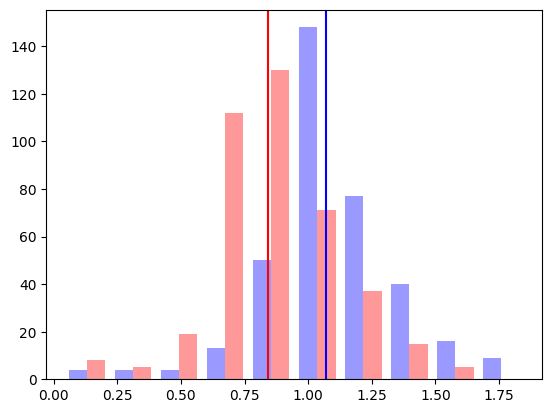

In [15]:
%matplotlib inline
plt.hist([stance_len_L1,stance_len_R1, ], alpha =0.4, color = ['b', 'r'])
plt.axvline(np.median(stance_len_L1), color ='b')
plt.axvline(np.median(stance_len_R1), color ='r')

##  Mid legs

In [16]:
# L2 

In [17]:
L2_SC = P9RT_100_lightON['R2_stepcycle'].astype(int)
L2_diff = pd.DataFrame(np.diff(np.array(L2_SC)))
L2_TD_frame= pd.DataFrame(L2_diff.index[L2_diff[0]==1])
L2_LO_frame = pd.DataFrame(L2_diff.index[L2_diff[0]==-1])

In [18]:
# getting pairs of TD and LO
L2_TD = []
L2_LO = []
for i in range(len(L2_TD_frame)-1):
    first_elem = L2_TD_frame.iloc[i,0]
    second_elem = L2_TD_frame.iloc[i+1,0]
    
    for i in range(len(L2_LO_frame)-1):
        test_elem = L2_LO_frame.iloc[i,0]
        if first_elem<test_elem<second_elem:
            L2_TD.append(first_elem)
            L2_LO.append(test_elem)

In [19]:
L2_TaG_idx = [76,77,78]
L2_TaG = P9RT_100_lightON.iloc[:,L2_TaG_idx ]

In [20]:
L2_TD_pos= pd.DataFrame()
for step in range(len(L2_TD)):
    temp_TD = L2_TD_frame.iloc[step]
    L2_TD_pos = pd.concat([L2_TD_pos, L2_TaG.iloc[temp_TD, :]])
    
L2_LO_pos= pd.DataFrame()
for step in range(len(L2_LO)):
    temp_LO = L2_LO_frame.iloc[step]
    L2_LO_pos = pd.concat([L2_LO_pos, L2_TaG.iloc[temp_LO, :]])
    
stance_len_L2 =[]
for step in range(len(L2_TD_pos)):
    temp_len = math.dist(L2_TD_pos.iloc[step,:], L2_LO_pos.iloc[step,:])
    stance_len_L2.append(temp_len)

In [21]:
# R2

In [22]:
R2_SC = P9RT_100_lightON['L2_stepcycle'].astype(int)
R2_diff = pd.DataFrame(np.diff(np.array(R2_SC)))
R2_TD_frame= pd.DataFrame(R2_diff.index[R2_diff[0]==1])
R2_LO_frame = pd.DataFrame(R2_diff.index[R2_diff[0]==-1])

In [23]:
# getting pairs of TD and LO
R2_TD = []
R2_LO = []
for i in range(len(R2_TD_frame)-1):
    first_elem = R2_TD_frame.iloc[i,0]
    second_elem = R2_TD_frame.iloc[i+1,0]
    
    for i in range(len(R2_LO_frame)-1):
        test_elem = R2_LO_frame.iloc[i,0]
        if first_elem<test_elem<second_elem:
            R2_TD.append(first_elem)
            R2_LO.append(test_elem)

In [24]:
R2_TaG_idx = [31,32,33]
R2_TaG = P9RT_100_lightON.iloc[:,R2_TaG_idx ]

In [25]:
R2_TD_pos= pd.DataFrame()
for step in range(len(L2_TD)):
    temp_TD = R2_TD_frame.iloc[step]
    R2_TD_pos = pd.concat([R2_TD_pos, R2_TaG.iloc[temp_TD, :]])
    
R2_LO_pos= pd.DataFrame()
for step in range(len(R2_LO)):
    temp_LO = R2_LO_frame.iloc[step]
    R2_LO_pos = pd.concat([R2_LO_pos, R2_TaG.iloc[temp_LO, :]])
    
stance_len_R2 =[]
for step in range(len(R2_TD_pos)):
    temp_len = math.dist(R2_TD_pos.iloc[step,:], R2_LO_pos.iloc[step,:])
    stance_len_R2.append(temp_len)

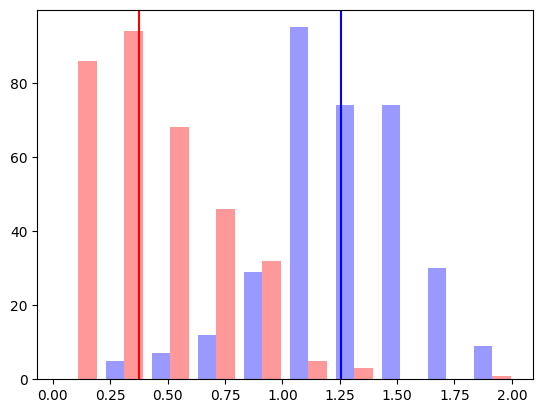

In [26]:
plt.hist([stance_len_L2,stance_len_R2, ], alpha =0.4, color = ['b', 'r'])
plt.axvline(np.median(stance_len_L2), color ='b')
plt.axvline(np.median(stance_len_R2), color ='r')

## hind Legs

In [27]:
# L3 

In [28]:
L3_SC = P9RT_100_lightON['R3_stepcycle'].astype(int)
L3_diff = pd.DataFrame(np.diff(np.array(L3_SC)))
L3_TD_frame= pd.DataFrame(L3_diff.index[L3_diff[0]==1])
L3_LO_frame = pd.DataFrame(L3_diff.index[L3_diff[0]==-1])

In [29]:
# getting pairs of TD and LO
L3_TD = []
L3_LO = []
for i in range(len(L3_TD_frame)-1):
    first_elem = L3_TD_frame.iloc[i,0]
    second_elem = L3_TD_frame.iloc[i+1,0]
    
    for i in range(len(L3_LO_frame)-1):
        test_elem = L3_LO_frame.iloc[i,0]
        if first_elem<test_elem<second_elem:
            L3_TD.append(first_elem)
            L3_LO.append(test_elem)

In [30]:
L3TaG_idx = [91,92,93]
L3_TaG = P9RT_100_lightON.iloc[:,L3TaG_idx ]

In [31]:
L3_TaG

,L-H-TaG_x,L-H-TaG_y,L-H-TaG_z
0,-1.714561,1.109087,90.226025
1,-1.651238,1.119404,90.071595
2,-1.615158,1.120391,89.971374
3,-1.606181,1.121939,89.916510
4,-1.613849,1.132795,89.884657
...,...,...,...
9667,-1.474386,1.024540,91.148491
9668,-1.459696,1.077892,91.140679
9669,-1.466809,1.094392,91.088834
9670,-1.481416,1.097392,91.021610


In [32]:
L3_TD_pos= pd.DataFrame()
for step in range(len(L3_TD)):
    temp_TD = L3_TD_frame.iloc[step]
    L3_TD_pos = pd.concat([L3_TD_pos, L3_TaG.iloc[temp_TD, :]])
    
L3_LO_pos= pd.DataFrame()
for step in range(len(L3_LO)):
    temp_LO = L3_LO_frame.iloc[step]
    L3_LO_pos = pd.concat([L3_LO_pos, L3_TaG.iloc[temp_LO, :]])
    
stance_len_L3 =[]
for step in range(len(L3_TD_pos)):
    temp_len = math.dist(L3_TD_pos.iloc[step,:], L3_LO_pos.iloc[step,:])
    stance_len_L3.append(temp_len)

In [33]:
# R3

In [34]:
R3_SC = P9RT_100_lightON['L3_stepcycle'].astype(int)
R3_diff = pd.DataFrame(np.diff(np.array(R3_SC)))
R3_TD_frame= pd.DataFrame(R3_diff.index[R3_diff[0]==1])
R3_LO_frame = pd.DataFrame(R3_diff.index[R3_diff[0]==-1])

In [35]:
# getting pairs of TD and LO
R3_TD = []
R3_LO = []
for i in range(len(R3_TD_frame)-1):
    first_elem = R3_TD_frame.iloc[i,0]
    second_elem = R3_TD_frame.iloc[i+1,0]
    
    for i in range(len(R3_LO_frame)-1):
        test_elem = R3_LO_frame.iloc[i,0]
        if first_elem<test_elem<second_elem:
            R3_TD.append(first_elem)
            R3_LO.append(test_elem)

In [36]:
R3_TaG_idx = [46,47,48]
R3_TaG = P9RT_100_lightON.iloc[:,R3_TaG_idx ]

In [37]:
R3_TaG

,R-H-TaG_x,R-H-TaG_y,R-H-TaG_z
0,-1.480518,1.170248,89.643091
1,-1.477152,1.181193,89.620275
2,-1.472490,1.189733,89.619814
3,-1.476927,1.195058,89.627676
4,-1.496362,1.202506,89.636118
...,...,...,...
9667,-0.774431,1.291884,88.848817
9668,-0.740813,1.312628,88.810541
9669,-0.705222,1.321028,88.775805
9670,-0.676324,1.319450,88.751006


In [38]:
R3_TD_pos= pd.DataFrame()
for step in range(len(R3_TD)):
    temp_TD = R3_TD_frame.iloc[step]
    R3_TD_pos = pd.concat([R3_TD_pos, R3_TaG.iloc[temp_TD, :]])
    
R3_LO_pos= pd.DataFrame()
for step in range(len(R3_LO)):
    temp_LO = R3_LO_frame.iloc[step]
    R3_LO_pos = pd.concat([R3_LO_pos, R3_TaG.iloc[temp_LO, :]])
    
stance_len_R3 =[]
for step in range(len(R3_TD_pos)):
    temp_len = math.dist(R3_TD_pos.iloc[step,:], R3_LO_pos.iloc[step,:])
    stance_len_R3.append(temp_len)

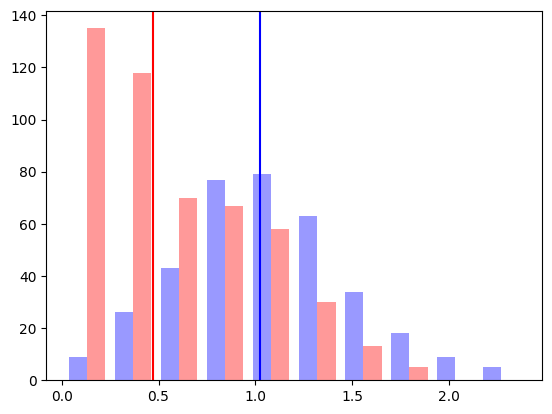

In [39]:
plt.hist([stance_len_L3,stance_len_R3, ], alpha =0.4, color = ['b', 'r'])
plt.axvline(np.median(stance_len_L3), color ='b')
plt.axvline(np.median(stance_len_R3), color ='r')

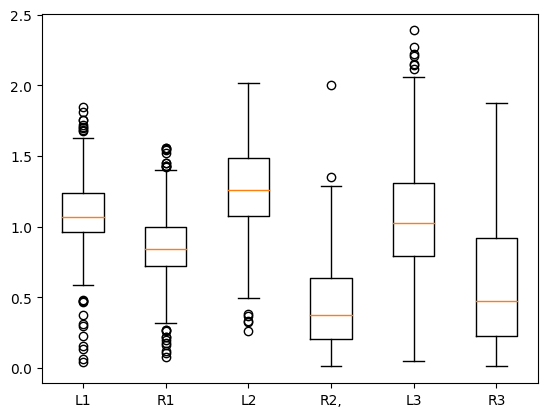

In [40]:
plt.boxplot([stance_len_L1, stance_len_R1,stance_len_L2, stance_len_R2,stance_len_L3, stance_len_R3], labels = ['L1', 'R1', 'L2', 'R2,', 'L3', 'R3'])
plt.show()

# Step Period

In [41]:
# time between consecutive touchdowns

In [42]:
L1_SP = np.diff(np.array(L1_TD))
L2_SP = np.diff(np.array(L2_TD))
L3_SP = np.diff(np.array(L3_TD))

R1_SP = np.diff(np.array(R1_TD))
R2_SP = np.diff(np.array(R2_TD))
R3_SP = np.diff(np.array(R3_TD))

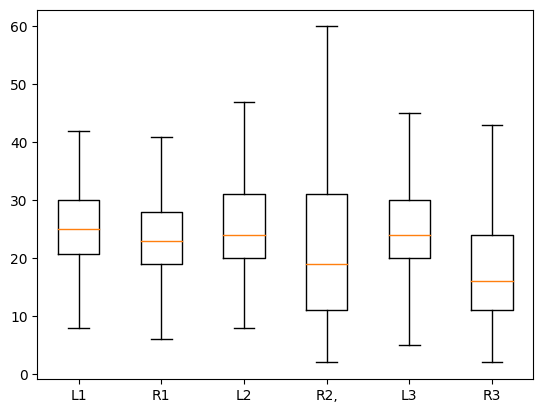

In [43]:
plt.boxplot([L1_SP, R1_SP,L2_SP, R2_SP,L3_SP, R3_SP], labels =['L1', 'R1', 'L2', 'R2,', 'L3', 'R3'], showfliers=False)
plt.show()

# Duty cycle

In [44]:
# fraction of step period spent in stance

In [45]:
L1_SD = []
for i in range (len(L1_LO)-1):
    temp_SD = L1_LO[i] - L1_TD[i] # SD = stance duration
    L1_SD.append (temp_SD)
    
L2_SD = []
for i in range (len(L2_LO)-1):
    temp_SD = L2_LO[i] - L2_TD[i] # SD = stance duration
    L2_SD.append (temp_SD)
    
L3_SD = []
for i in range (len(L3_LO)-1):
    temp_SD = L3_LO[i] - L3_TD[i] # SD = stance duration
    L3_SD.append (temp_SD)
    
R1_SD = []
for i in range (len(R1_LO)-1):
    temp_SD = R1_LO[i] - R1_TD[i] # SD = stance duration
    R1_SD.append (temp_SD)
    
R2_SD = []
for i in range (len(R2_LO)-1):
    temp_SD = R2_LO[i] - R2_TD[i] # SD = stance duration
    R2_SD.append (temp_SD)
    
R3_SD = []
for i in range (len(R3_LO)-1):
    temp_SD = R3_LO[i] - R3_TD[i] # SD = stance duration
    R3_SD.append (temp_SD)

In [46]:
L1_DC = []
for i in range(len(L1_SD)):
    temp_DC =L1_SD[i] / L1_SP[i]
    L1_DC.append(temp_DC)
    
L2_DC = []
for i in range(len(L2_SD)):
    temp_DC =L2_SD[i] / L2_SP[i] 
    L2_DC.append(temp_DC)
    
L3_DC = []
for i in range(len(L3_SD)):
    temp_DC =L3_SD[i] / L3_SP[i]
    L3_DC.append(temp_DC)
    
R1_DC = []
for i in range(len(R1_SD)):
    temp_DC =R1_SD[i] / R1_SP[i]
    R1_DC.append(temp_DC)
    
R2_DC = []
for i in range(len(R2_SD)):
    temp_DC= R2_SD[i] / R2_SP[i]
    R2_DC.append(temp_DC)
    
R3_DC = []
for i in range(len(R3_SD)):
    temp_DC =R3_SD[i] / R3_SP[i]
    R3_DC.append(temp_DC)

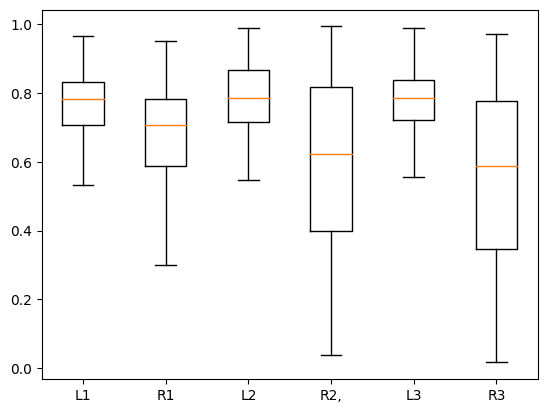

In [47]:
plt.boxplot([L1_DC, R1_DC,L2_DC, R2_DC,L3_DC, R3_DC], labels =['L1', 'R1', 'L2', 'R2,', 'L3', 'R3'], showfliers=False)
plt.show()

# Swing Duration

In [48]:
L1_swing = []
for i in range (len(L1_LO)-1):
    temp_sw = L1_SP[i] - L1_SD[i] # SD = stance duration
    L1_swing.append (temp_sw)
    
L2_swing = []
for i in range (len(L2_LO)-1):
    temp_sw = L2_SP[i] - L2_SD[i] # SD = stance duration
    L2_swing.append (temp_sw)
    
L3_swing = []
for i in range (len(L3_LO)-1):
    temp_sw = L3_SP[i] - L3_SD[i] # SD = stance duration
    L3_swing.append (temp_sw)
    
R1_swing = []
for i in range (len(R1_LO)-1):
    temp_sw = R1_SP[i] - R1_SD[i] # SD = stance duration
    R1_swing.append (temp_sw)
    
R2_swing = []
for i in range (len(R2_LO)-1):
    temp_sw = R2_SP[i] - R2_SD[i] # SD = stance duration
    R2_swing.append (temp_sw)
    
R3_swing = []
for i in range (len(R3_LO)-1):
    temp_sw = R3_SP[i] - R3_SD[i] # SD = stance duration
    R3_swing.append (temp_sw)

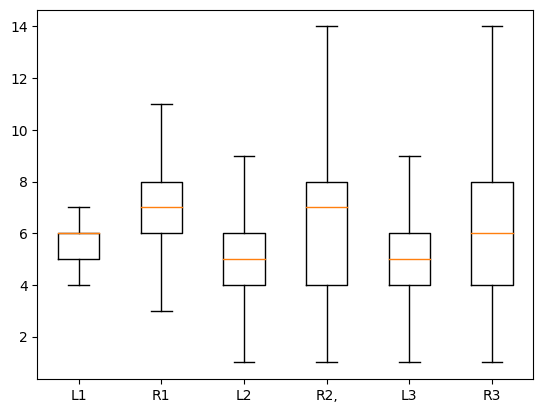

In [49]:
plt.boxplot([L1_swing, R1_swing,L2_swing, R2_swing,L3_swing, R3_swing], labels =['L1', 'R1', 'L2', 'R2,', 'L3', 'R3'], showfliers=False)
plt.show()

<IPython.core.display.Javascript object>


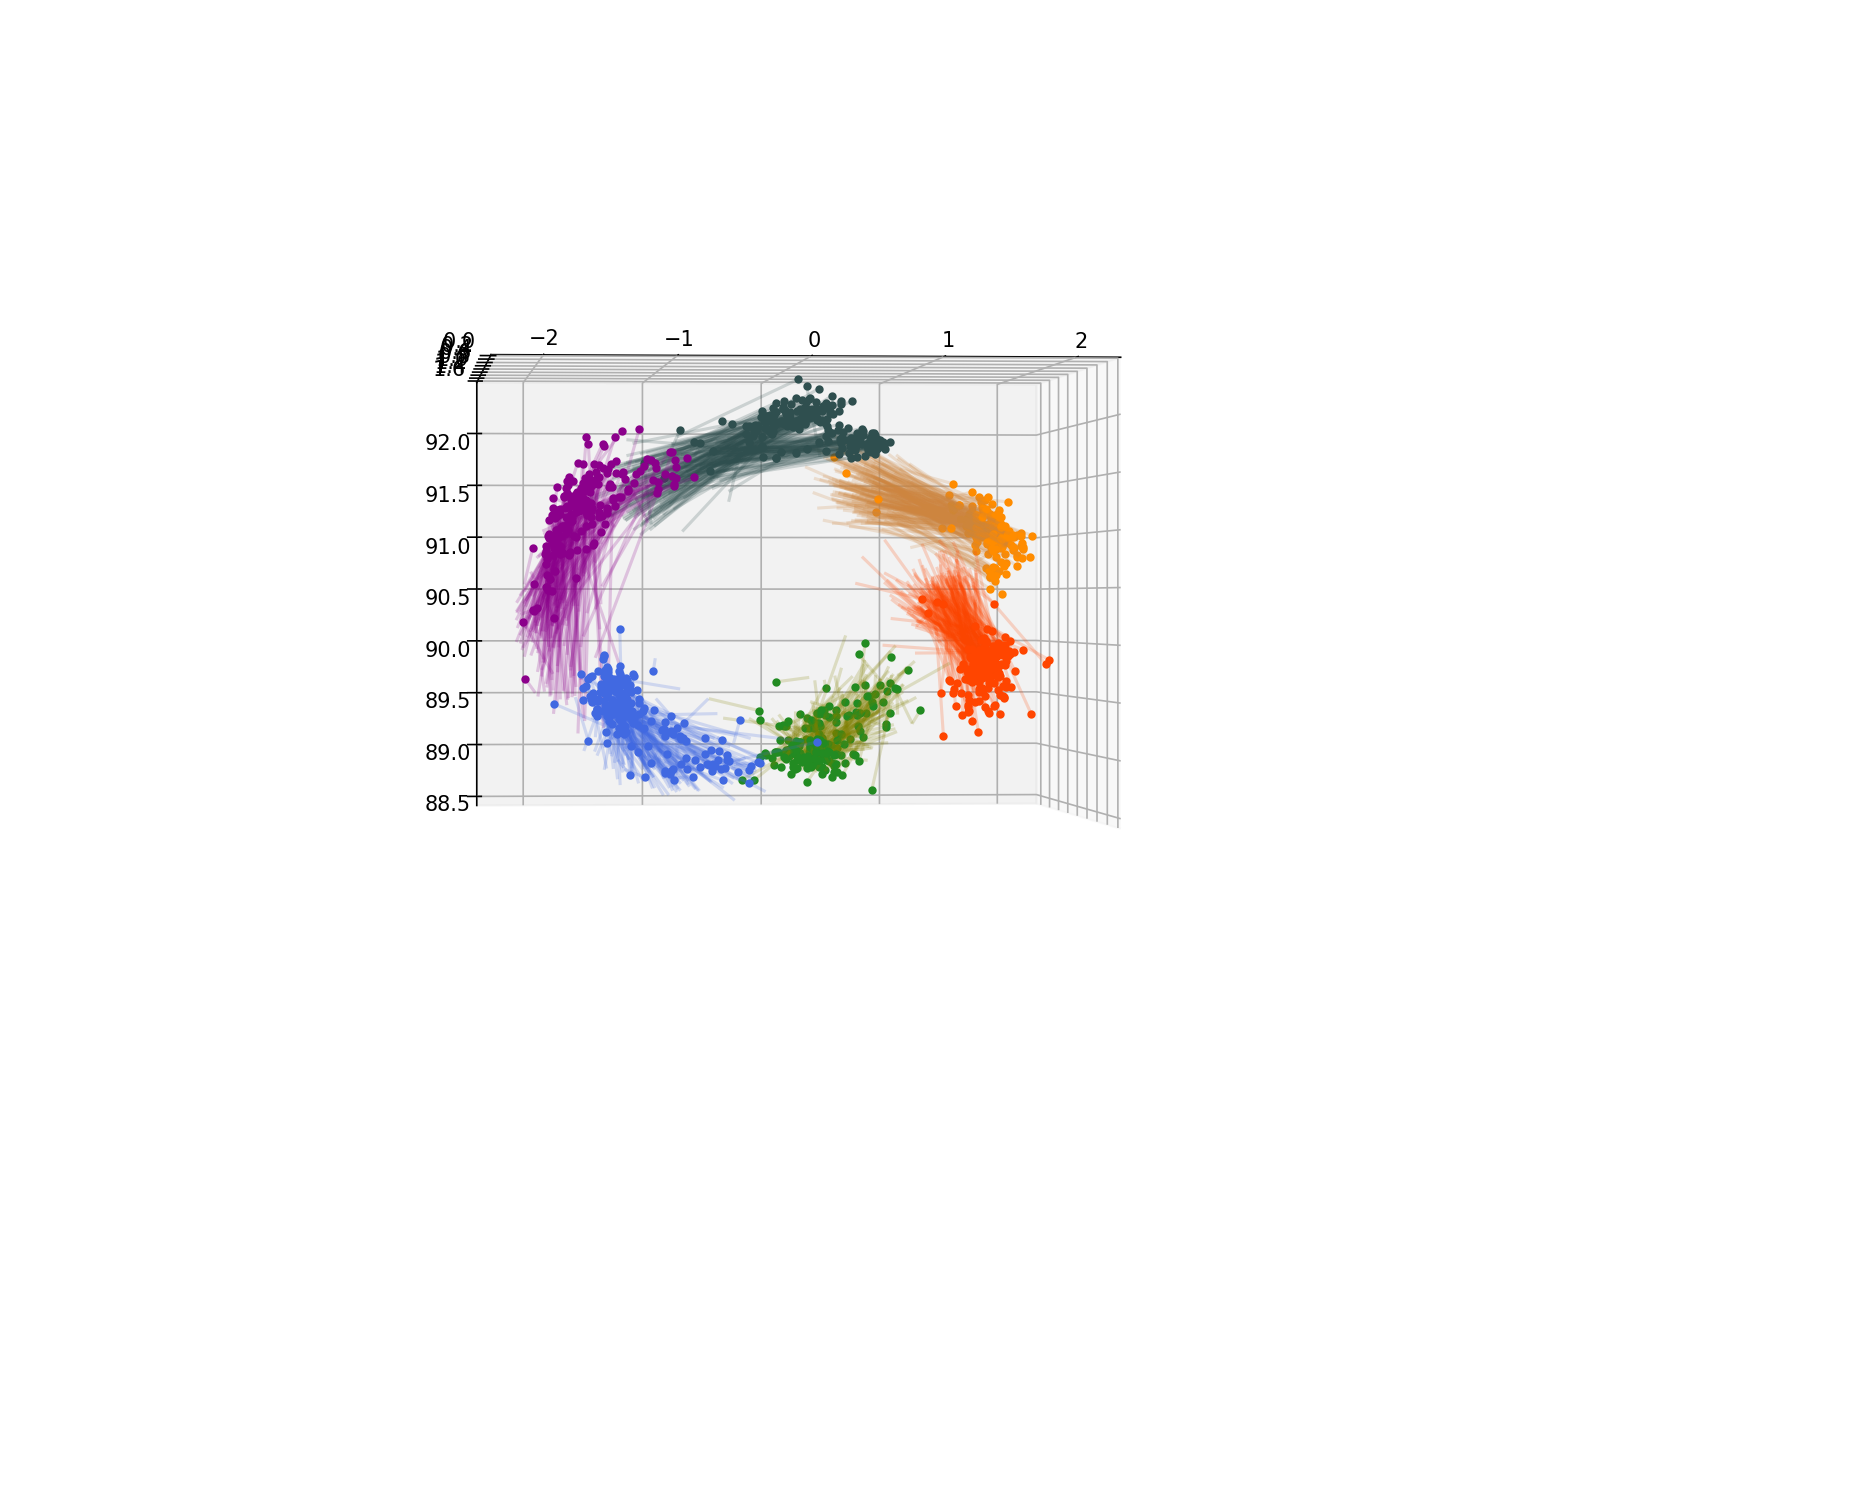

In [50]:
%matplotlib notebook
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(projection="3d")
for i in range (200):
    x, y, z = [L1_TD_pos.iloc[i,0], L1_LO_pos.iloc[i,0]], [L1_TD_pos.iloc[i,1], L1_LO_pos.iloc[i,1]], [L1_TD_pos.iloc[i,2], L1_LO_pos.iloc[i,2]]
    ax.plot(x, y, z, color = 'peru' ,alpha = 0.2, linewidth=1.5)
    ax.plot3D(L1_TD_pos.iloc[i,0],L1_TD_pos.iloc[i,1],L1_TD_pos.iloc[i,2], '.', color = 'darkorange')
    
for i in range (200):
    x, y, z = [R1_TD_pos.iloc[i,0], R1_LO_pos.iloc[i,0]], [R1_TD_pos.iloc[i,1], R1_LO_pos.iloc[i,1]], [R1_TD_pos.iloc[i,2], R1_LO_pos.iloc[i,2]]
    ax.plot(x, y, z, color = 'orangered' ,alpha = 0.2, linewidth=1.5) 
    ax.plot3D(R1_TD_pos.iloc[i,0],R1_TD_pos.iloc[i,1],R1_TD_pos.iloc[i,2], '.', color = 'orangered')
    
for i in range (200):
    x, y, z = [L2_TD_pos.iloc[i,0], L2_LO_pos.iloc[i,0]], [L2_TD_pos.iloc[i,1], L2_LO_pos.iloc[i,1]], [L2_TD_pos.iloc[i,2], L2_LO_pos.iloc[i,2]]
    ax.plot(x, y, z,color = 'darkslategrey' ,  alpha = 0.2, linewidth=1.5)  
    ax.plot3D(L2_TD_pos.iloc[i,0],L2_TD_pos.iloc[i,1],L2_TD_pos.iloc[i,2], '.', color = 'darkslategrey')
    
for i in range (200):
    x, y, z = [R2_TD_pos.iloc[i,0], R2_LO_pos.iloc[i,0]], [R2_TD_pos.iloc[i,1], R2_LO_pos.iloc[i,1]], [R2_TD_pos.iloc[i,2], R2_LO_pos.iloc[i,2]]
    ax.plot(x, y, z, color = 'olive' , alpha = 0.2, linewidth=1.5) 
    ax.plot3D(R2_TD_pos.iloc[i,0],R2_TD_pos.iloc[i,1],R2_TD_pos.iloc[i,2], '.', color = 'forestgreen')
    
for i in range (200):
    x, y, z = [L3_TD_pos.iloc[i,0], L3_LO_pos.iloc[i,0]], [L3_TD_pos.iloc[i,1], L3_LO_pos.iloc[i,1]], [L3_TD_pos.iloc[i,2], L3_LO_pos.iloc[i,2]]
    ax.plot(x, y, z, color = 'darkmagenta', alpha = 0.2, linewidth=1.5) 
    ax.plot3D(L3_TD_pos.iloc[i,0],L3_TD_pos.iloc[i,1],L3_TD_pos.iloc[i,2], '.', color = 'darkmagenta')
    
for i in range (200):
    x, y, z = [R3_TD_pos.iloc[i,0], R3_LO_pos.iloc[i,0]], [R3_TD_pos.iloc[i,1], R3_LO_pos.iloc[i,1]], [R3_TD_pos.iloc[i,2], R3_LO_pos.iloc[i,2]]
    ax.plot(x, y, z,color = 'royalblue', alpha = 0.2, linewidth=1.5) 
    ax.plot3D(R3_TD_pos.iloc[i,0],R3_TD_pos.iloc[i,1],R3_TD_pos.iloc[i,2], '.', color = 'royalblue')
    


plt.show()
